# Project 6  - Create a counterfeit banknote detection algorithm based on Logistic Regression

## Get started

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(Path.cwd()/'notes.csv')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


The dataset is labelled and contains the following information:
- The length of the ticket (in mm);
- The height of the ticket (measured on the left side, in mm);
- The height of the ticket (measured on the right side, in mm);
- The margin between the top edge of the banknote and the image thereof (in mm);
- The margin between the lower edge of the banknote and the image thereof (in mm);
- The diagonal of the banknote (in mm).
- label column type boolean 

## Data Description

Let's start by having a look on the structure of the dataset and the global quality.

In [93]:
df.shape

(170, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [8]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [10]:
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<div class='info info-block info-alert'>

Nothing looks odd: none missing values, none extremes or atypical values.
The data format is good.    

## Univariate Analysis

### Distribution

In [184]:
tmp = tmp1.iloc[:,1:] # we remove the boolean column for the distribution

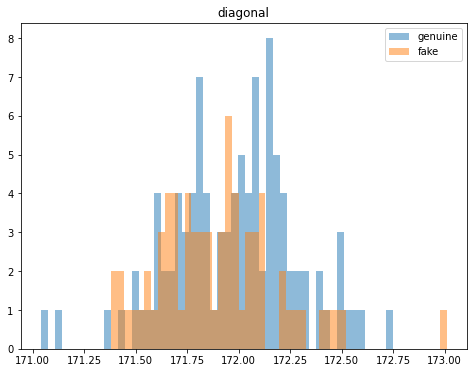

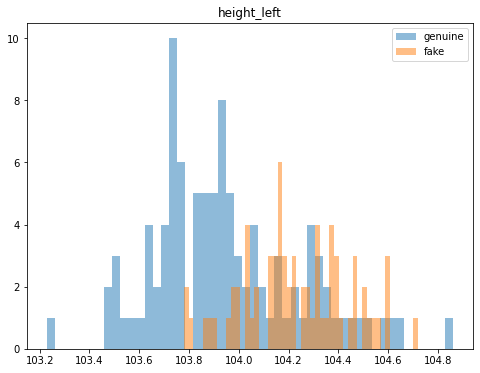

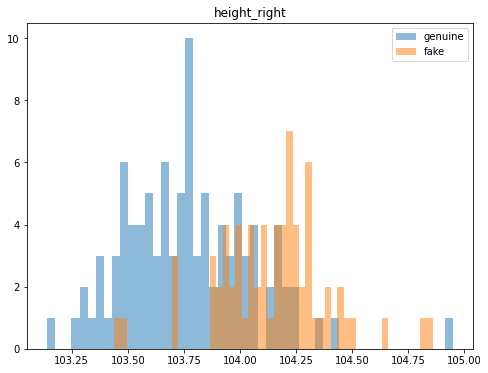

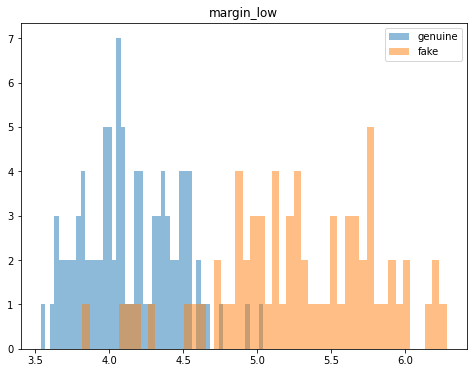

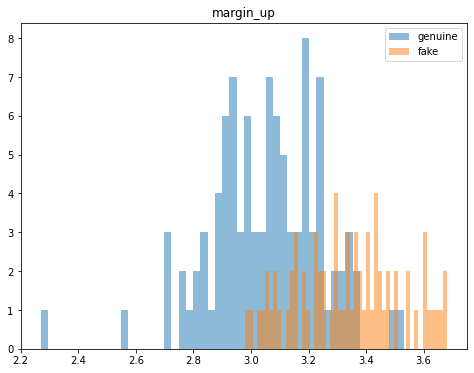

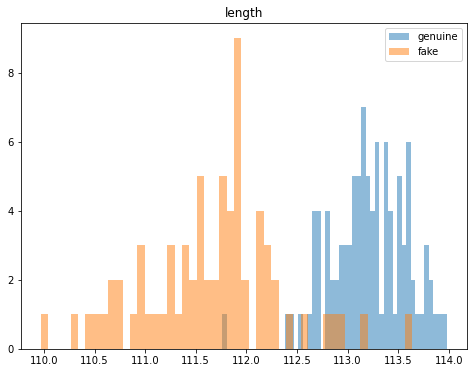

In [185]:
# Check the Distribution for each columns
for i in tmp.columns:
    plt.figure(figsize=(8,6))
    tmp1 = df[df['is_genuine'] == True]
    tmp2 = df[df['is_genuine'] == False]
    plt.hist(tmp1[i], bins=50, alpha=0.5, label="genuine")
    plt.hist(tmp2[i], bins=50, alpha=0.5, label="fake")
    plt.title(i)
    plt.legend(loc='upper right')

  
- We can see that the distributions for each variables look slightly different, whether or not, the note is genuine. In particular, for length, margin up/low and height. This observation is not that strong for diagonal. Perhaps, we will drop this variable later depending on the results of the ACP.

    This is interesting for our case, as we want to use these variables to classify the notes in 2 groups: genuine / fake. 
    
- All in all, each variables seem to be normally distribute. However, some of them (fx. diagonal) are skewed most likely due to extreme values. Let's use boxplots to see whether or not these values can be considered as outliers.

### Box-plot

/Users/aureliegiraud/.virtualenvs/env3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


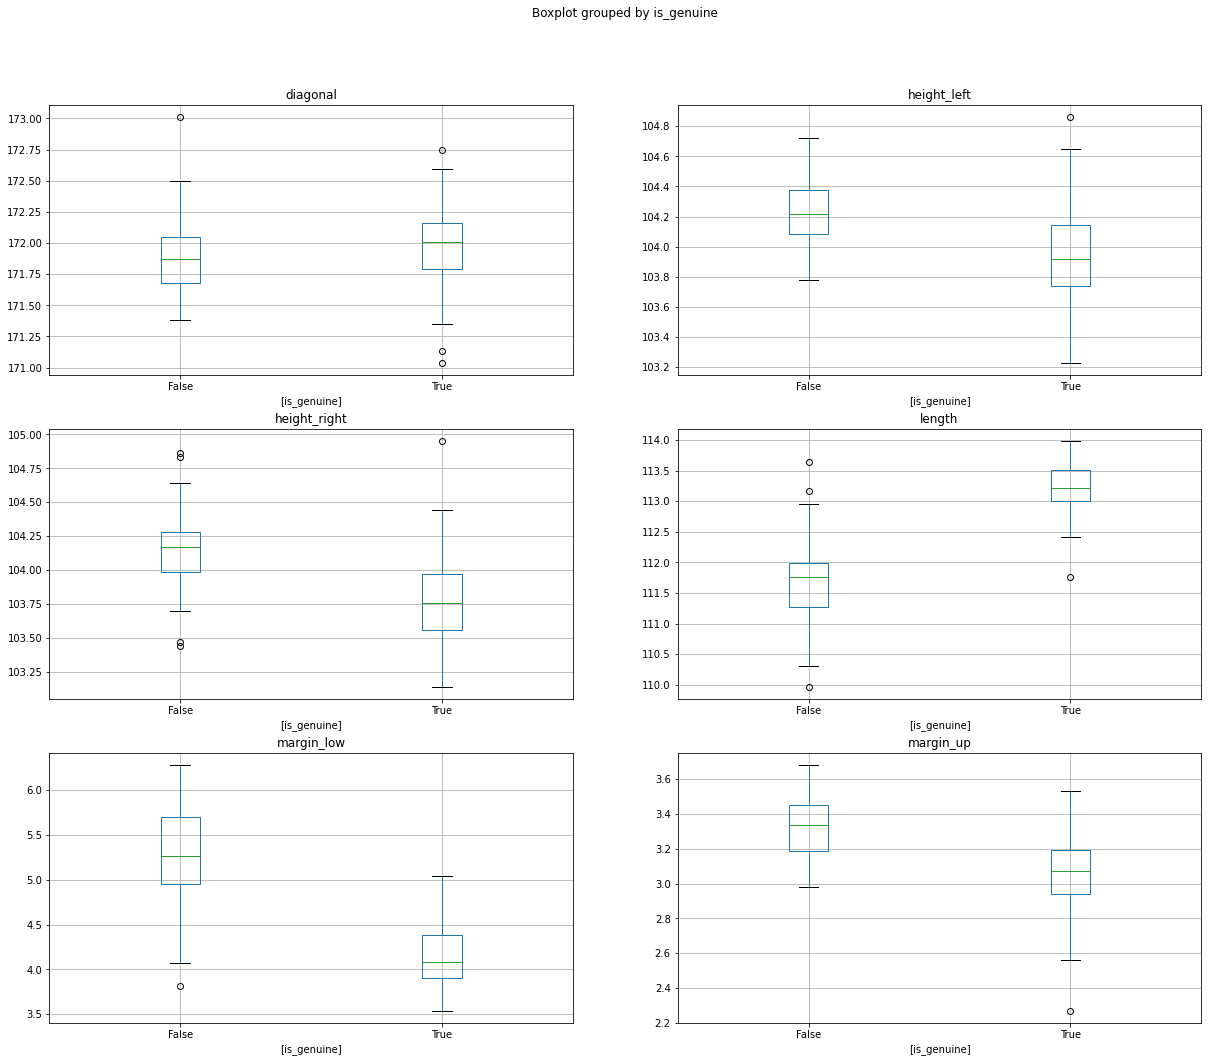

In [160]:
fig, ax_new = plt.subplots(3,2, sharey=False,figsize=(20,17))
df.boxplot(by="is_genuine",ax=ax_new)
plt.show()